## Derivation of Hamilton-Jacobi-Bellman Equation

$$V_T(x(0), 0) = \min\limits_u \left\{ \int_0^T C[x(t), u(t)] dt + D[x(T)] \right\}$$

$$V(x(t), t) = \min\limits_u \left\{ V(x(t + dt), t + dt) +  \int_0^T C[x(t), u(t)] dt + D[x(T)] \right\}$$

$$\frac{dx}{dt} = F[x(t), u(t)]$$

By Taylor Series expansion:

$$V(x(t + dt), t + dt) = V(x(t), t) + \frac{\partial V(x, t)}{\partial t} dt + \frac{\partial V(x, t)}{\partial x} F[x(t), u(t)] dt + O(dt)$$

$$V(x(t), t) = \min\limits_u \left\{ V(x(t), t) + \frac{\partial V(x, t)}{\partial t} dt + \frac{\partial V(x, t)}{\partial x} F[x(t), u(t)] dt + O(dt) +  \int_0^T C[x(t), u(t)] dt + D[x(T)] \right\}$$

$$0 = \min\limits_u \left\{ \frac{\partial V(x, t)}{\partial t} dt + \frac{\partial V(x, t)}{\partial x} F[x(t), u(t)] dt + O(dt) +  \int_0^T C[x(t), u(t)] dt + D[x(T)] \right\}$$

Divide by $dt$ and take the limits at $dt \rightarrow 0$:
$$0 = \min\limits_u \left\{ \frac{\partial V(x, t)}{\partial t} + \frac{\partial V(x, t)}{\partial x} F[x(t), u(t)] + C[x(t), u(t)] \right\}$$

$$\frac{\partial V(x, t)}{\partial t} + \min\limits_u \left\{ \frac{\partial V(x, t)}{\partial x} F[x(t), u(t)] + C[x(t), u(t)] \right\} = 0$$



See (https://en.wikipedia.org/wiki/Hamilton%E2%80%93Jacobi%E2%80%93Bellman_equation)

## Hamilton Jacobi Isaacs Equation

HJB with differential game and two inputs, disturbance u and input d.

Consider the Hamlton-Jacobi-Isaacs equation:

$$ \frac{\partial V(t, x)}{\partial t} + \max\limits_d \min\limits_u \left\{ \frac{\partial V(t, x)}{\partial x} F(x, u, d) + C(x, u, d)\right\} = 0$$

$$ V(x, T) = D(x) $$

Backward time, upwind finite differencing scheme.

$$ \frac{\partial V(t, x)}{\partial t} + \max\limits_d \min\limits_u \left\{ \frac{\partial V(t, x)}{\partial x} F(x, u, d) + C(x, u, d) \right\} = 0$$

$$ \frac{V^{n}_{j} - V^{n-1}_{j}}{\Delta t}  + \max\limits_d  \min\limits_u \left\{ 
\begin{cases}
\frac{V^{n}_{j} - V^{n}_{j-1}}{\Delta x} & F(x, u, d) < 0 \\
\frac{V^{n}_{j+1} - V^{n}_{j}}{\Delta x} & F(x, u, d) \geq 0
\end{cases} F(x, u, d) + C(x, u, d)
\right\} = 0$$

$$ V^{n-1}_{j}  = V^{n}_{j} + \Delta t \max\limits_d  \min\limits_u \left\{
\begin{cases}
\frac{V^{n}_{j} - V^{n}_{j-1}}{\Delta x} & F(x, u, d) < 0 \\
\frac{V^{n}_{j+1} - V^{n}_{j}}{\Delta x} & F(x, u, d) \geq 0
\end{cases} F(x, u, d) + C(x, u, d)
\right\}$$

Now we solve for the optimal input for linear dynamics: $f(x, u, d) = A x + B u + d$, assuming $V(t, x)$ has the form $V(t, x) = x^T P(t) x$ and $C(x, u, d)$ has the form $C(x, u, d) = x^T Q x + u^T R u + d^T L d$:

$$\max\limits_d  \min\limits_u \left\{ \frac{\partial V(t, x)}{\partial x} F(x, u, d) + C(x, u, d)\right\}$$

$$= \max\limits_d  \min\limits_u \left\{ 2 x^T P (Ax + Bu + d) + x^T Q x + u^T R u + d^T L d\right\}$$

We will assume the controller operates assuming there is no distrubance, $d=0$.

First solve for the optimal control input in the absense of disturbance, $u^*$.

$$2x^T P B + 2u^T R = 0$$
$$u^T R = -x^T P B$$
$$R u = - B^T P x$$
$$u^* = - R^{-1} B^{T} P x$$


Note that this is simply the finite time horizon LQR. If we set $D(x, u)$ such that the cost is equal to the converged cost, we can approximate the inifinite horizon LQR.

First solve for the optimal disturbance, $d^*$.

$$ d^{*} = arg \max\limits_d  \left\{ x^T \left(PA + A^T P + P BR^{-1}B^{T}P + Q \right) x + 2x^TP d + d^T L d)\right\}$$

If L is zero, then means the disturbance has no impact on the running cost, but it still has a constraint. We will assume the constraint, the euclidean norm of  $d$, $||d||$, is less than 1. In this case, the problem can be solved using Lagrange multipliers.

From
$$ \frac{\partial V(t, x)}{\partial t} + \max\limits_d \min\limits_u \left\{ \frac{\partial V(t, x)}{\partial x} F(x, u, d) + C(x, u, d) \right\} = 0$$

We see that if $V(t, x) = x^T P x$, $F(x, u, d) = Ax + Bu$, $C(x, u, d) = x^TQx + u^TR u$, $u=-R^{-1}B^TPx$

then:

$$ x^T \dot{P} x + 2 x^T P (A x  - B R^{-1} B^{T} P x) + x^T Qx + x^T P B R^{-1} B^{T} P x = 0$$

$$ x^T \left(\dot{P} + A^T P + P A - P B R^{-1} B^{T} P + Q\right) x = 0$$

$$ -\dot{P} = A^T P + P A - P B R^{-1} B^{T} P + Q $$

C ARE check [[0.]]
K lqr:  [[2.41421356]]
courant # 0.8006012024048147


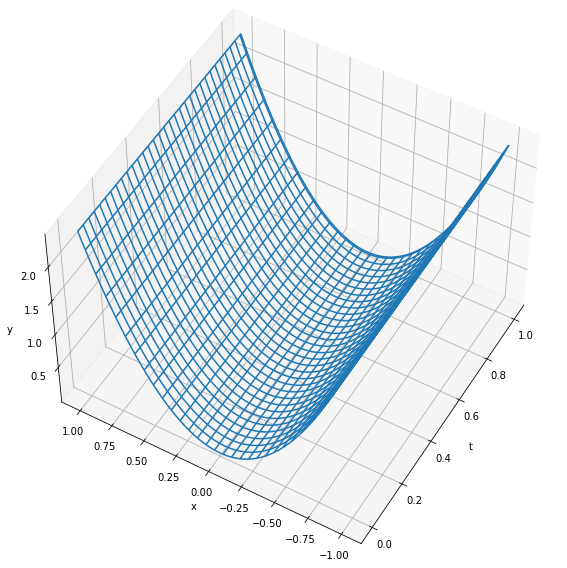

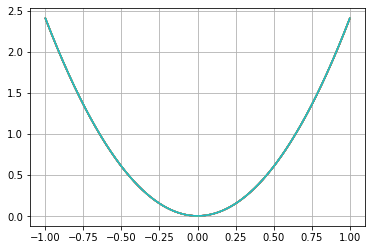

In [200]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.linalg

l = 500
0 # time grid
tf = 1
t = np.linspace(0, tf, l)
dt = t[1] - t[0]

m = 800 # space grid
x = np.linspace(-1, 1, m)
dx = x[1] - x[0]

A = np.eye(1)
B = np.eye(1)
R = np.eye(1)
Q = np.eye(1)
R_I = np.linalg.inv(R)

P_lqr = scipy.linalg.solve_continuous_are(A, B, Q, R)
print('C ARE check', A.T@P_lqr + P_lqr@A - P_lqr@B@R_I@B.T@P_lqr + Q)
K_lqr = R_I@B.T@P_lqr
print('K lqr: ', K_lqr)

courant = dt/dx
print('courant #', courant)
assert courant < 1

def F(x, u, d):
    """
    Dynamics
    """
    return A@x + B@u + d

def C(x, u):
    """
    Running Cost
    """
    return x.T@Q@x + u.T@R@u

def D(x):
    """
    Final Cost
    """
    return x.T@K_lqr@x

V = np.zeros((l, m))
V[-1, :]  = [D(np.array([xi])) for xi in x]
V[:, 0] = V[-1, 0]
V[:, -1] = V[-1, -1]
K_val = np.zeros((l, m))
P_val = np.zeros((l, m))

for n in np.arange(l-1, 0, -1):
    for j in np.arange(1, m-1):
        x_j = np.array([x[j]])
        K = np.array([[0]])
        if np.abs(x_j) > np.finfo(np.float64).eps:
            P = np.array([[V[n,j]]])/ (x_j.T@x_j)
            K = R_I@B.T@P
            u_opt = -K@x_j
            if np.abs(K) > 10:
                u_opt = np.array([0])
        else:
            u_opt = np.array([0])
        K_val[n, j] = K
        P_val[n, j] = P
        d = np.array([0])
        f = F(x_j, u_opt, d)
        c = C(x_j, u_opt)

        # find dV_dx, upwind
        if f < 0:
            dV_dx = (V[n, j] - V[n, j-1])/dx
        else:
            dV_dx = (V[n, j+1] - V[n, j])/dx
        
        # find dV_dx, central differencing
        #dV_dx = (V[n, j+1] - V[n, j-1])/(2*dx)

        V[n-1, j] = V[n, j] + dV_dx*f*dt + c*dt

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

T, X = np.meshgrid(t, x)
ax.plot_wireframe(T, X, V.T, cstride=l//30, rstride=m//30)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
ax.view_init(elev=50, azim=210);

plt.figure()
plt.plot(x[1:m-1], V[np.arange(l-1, 0, -l//10), 1:m-1].T)
plt.grid();

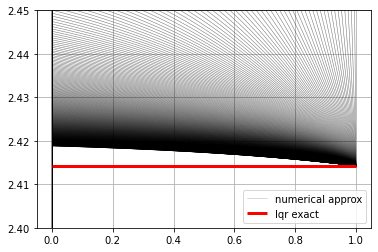

In [201]:
import control
h1 = plt.plot(t, K_val, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
h2 = plt.hlines(K_lqr, t[0], t[-1], linewidth=3, color='r', label='lqr exact')
plt.gca().set_ylim([2.4, 2.45])
plt.grid()
plt.legend()
plt.legend([h1[0], h2], ['numerical approx', 'lqr exact'])